# Expectile regression: an alternative for quantile regression

You might not know about that, but while **quantile regression** can be considered as a generalization of regression with **MAE objective**, the probably most widespread **(R)MSE**-based regression can be generalized in a similar way. It's called **expectile regression**.


Typically, when we face a regression task, we intuitively try to find for a model, which looks for something that can be defined as *conditional central tendency* of the target variable. This variable is also is many cases (but not always!) the same thing as *location parameter*.

In this article, I'll present the differences between MAE and quantile regression an the analogous relation between (R)MSE and quantile regression.

## Problem formulation - different characteristics of the target variable distribution

In [ ]:
def generate_

Let's assume we're solving a regression problem which is to predict the price of an real estate (a house or an apartment) based on its size.

The `DataFrame` below contains a set of real price-size pairs picked from the Polish real estate annoucement website [Otodom](otodom.pl). I've intentionally selected observations that vary a lot from each other.

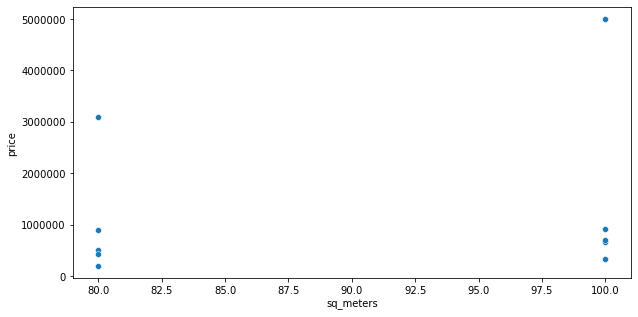

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

data = pd.DataFrame({
    'sq_meters': [80, 80, 80, 80, 80, 
                  100, 100, 100, 100, 100],
    'price': [520000, 3093160, 890000, 199000, 430000,
              670000, 925000, 330000, 4999999, 700000]
})

sns.scatterplot(data=data, x='sq_meters', y='price')
# plt.show()
plt.savefig('data.png')

Now, let's answer the question - what should be the price of a real estate when its area equals 80 square meters?
*Hey, we have not enough data to conclude'*, you may say. We cannot estimate an accurate price based only on that one particular feature: area. We'd also like to know where the given reals estate actually is located (exact city/town), number of rooms, object's condition etc. You are totally right, but bear in mind we'll never have all the information to get rid of all the incertainty when calculating a prediction. So please consider this exercise just as an experiment.

The first answer you'll probably come up with is to use an average for the each group. In such an approach, it can be easily calculated using pandas groupby methods.

In [3]:
data.groupby('sq_meters').mean()

,price
sq_meters,
80,1026432.0
100,1524999.8


Let's do the same using:

* [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) - minimizing sum of squared errors (equivalently: MAE or RMSE)
* [LADRegression]() - a linear model, but minimizing sum of asbolute deviation (equivalently: MAE)
* [QuatileRegression]() - generalization of LADRegression.

I've used here classes from the scikit-lego library. I could also make use of statsmodel, but I'd like to keep it consistent and choose classes with sklearn-like API if possible. Of course, you can always write such objects from scratch.

/home/krzysztof/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/krzysztof/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/krzysztof/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/krzysztof/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

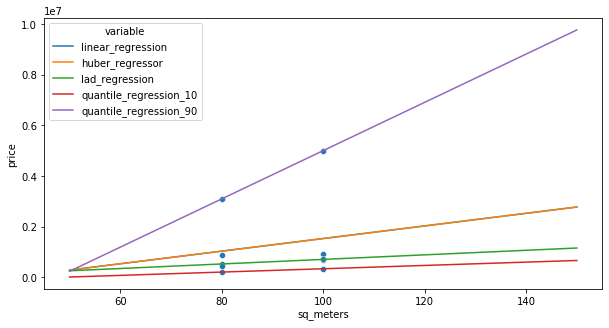

In [30]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklego.linear_model import LADRegression, QuantileRegression
import numpy as np

from typing import List


def linear_models(data: pd.DataFrame, 
                  features: List[str], 
                  target: List[str]):
    
    # Models
    linear_regression = \
        LinearRegression().fit(data[['sq_meters']], data[['price']])
    lad_regression = \
        LADRegression().fit(data[['sq_meters']], data[['price']])
    quantile_regression_10 = \
        QuantileRegression(quantile=0.1).fit(data[['sq_meters']], data[['price']])
    quantile_regression_90 = \
        QuantileRegression(quantile=0.9).fit(data[['sq_meters']], data[['price']])

    # Forecasts
    space = np.linspace(50, 150).reshape(-1, 1)

    pred = pd.DataFrame({
        'sq_meters': space.ravel(),
        'linear_regression': linear_regression.predict(space).ravel(),
        'lad_regression': lad_regression.predict(space).ravel(),
        'quantile_regression_10': quantile_regression_10.predict(space).ravel(),
        'quantile_regression_90': quantile_regression_90.predict(space).ravel()
    })

    pred = pred.melt('sq_meters')

    sns.scatterplot(data=data, x='sq_meters', y='price')
    sns.lineplot(data=pred, x='sq_meters', y='value', hue='variable')
    plt.show()

We can see it gave us exactly the same results as calculating group-wise means. This is a special case, because we only have two area-related groups: 80 and 100 meters. If we have more, the values estimated with the LinearRegression would be not necessary identical.

The goal of doing this exercise was basically to show you, what answer we're looking for when trying to optimize MSE or, equivalently, RMSE. 

## The same, but with more realistic data 

Choosing a simple linear model with the most typical objective, we're looking for the **center of the distribution**, while qunatile regression gives us some information about the upper and lower bound of the target regression distribution. Obviously

In [ ]:
# https://datascience.stackexchange.com/questions/66712/reason-for-generally-using-rmse-instead-of-mse-in-linear-regression

http://www.sp.unipg.it/surwey/images/workshop/nikos/Session-1_Pisa_July-2016.pdf